# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [2]:
%matplotlib notebook

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(5, 1, 10000)
x2 = np.random.gamma(2, 1, 10000)
x3 = np.random.exponential(1, 10000)
x4 = np.random.uniform(2,8, 10000)
x = [x1, x2, x3, x4] 

step_size = 20

# create the function that will do the plotting, where curr is the current frame
def animate(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == step_size: 
        a.event_source.stop()
    interval = int((10000//step_size)*curr)
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:interval], bins=50, density=True, alpha=0.6, color=colors[i])
        axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
        axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)
    fig.suptitle('Step = {}'.format(curr), alpha=0.6)

fig, ((ax_normal, ax_gamma), (ax_exp, ax_uniform)) = plt.subplots(2, 2, sharex=True, sharey=True)
axs = [ax_normal, ax_gamma, ax_exp, ax_uniform]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
titles = ['x1:Normal', 'x2:Gamma', 'x3:Exponential', 'x4:Uniform']
 
a = animation.FuncAnimation(fig, animate, frames=21, interval=300)
HTML(a.to_jshtml())

<IPython.core.display.Javascript object>


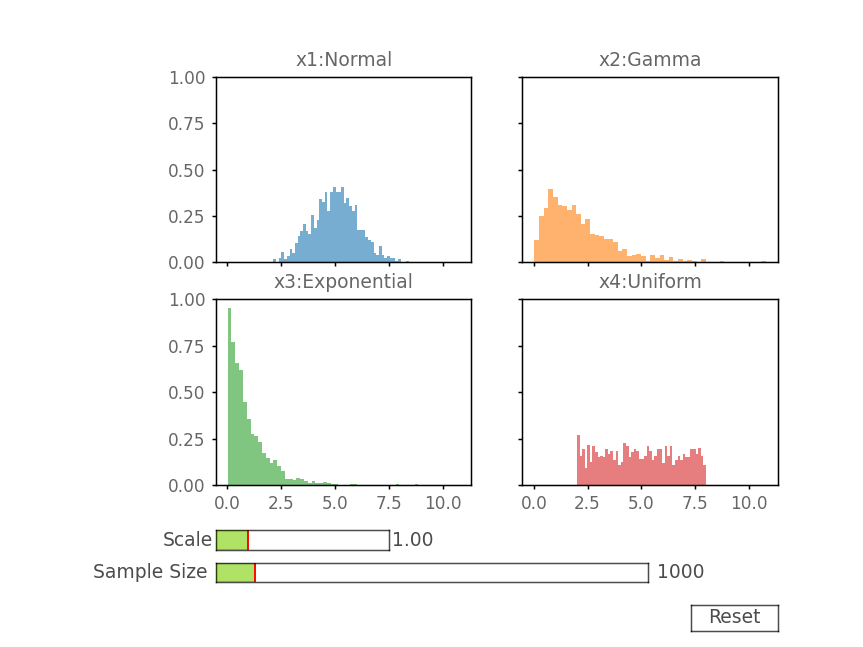

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button, CheckButtons

scale_def= 1
sample_def = 1000

def get_distributions(scale, sample):
    x1 = np.random.normal(5, scale_def, sample_def)
    x2 = np.random.gamma(2, scale_def, sample_def)
    x3 = np.random.exponential(scale_def, sample_def)
    x4 = np.random.uniform(2,8, sample_def)
    return x1, x2, x3, x4

x_init = get_distributions(scale_def, sample_def)

fig, ((ax_normal, ax_gamma), (ax_exp, ax_uniform)) = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(left=0.25, bottom=0.25)

axs = [ax_normal, ax_gamma, ax_exp, ax_uniform]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
titles = ['x1:Normal', 'x2:Gamma', 'x3:Exponential', 'x4:Uniform']

for i in range(len(axs)):
    axs[i].hist(x_init[i], bins=50, density=True, alpha=0.6, color=colors[i])
    axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
    axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)

#axsample = plt.axes([0.1, 0.3, 0.03, 0.5], facecolor='#ffffff', alpha=0.6)
axsample = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor='#ffffff', alpha=0.6)
axscale = plt.axes([0.25, 0.15, 0.2, 0.03], facecolor='#ffffff', alpha=0.6)

sample_slider = Slider(axsample, 'Sample Size', 100, 10000, valinit=sample_def, valstep=100, valfmt='%d', color = "#7ccf00", alpha=0.6) #orientation="vertical"
scale_slider = Slider(axscale, 'Scale', 0.1, 5, valinit=scale_def, valstep=0.1, color = "#7ccf00", alpha=0.6)

def update(val):
    sample = int(sample_slider.val)
    scale = scale_slider.val
    x = get_distributions(scale, sample)
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i], bins=50, density=True, alpha=0.6, color=colors[i])
        axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
        axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)
    fig.canvas.draw_idle()

sample_slider.on_changed(update)
scale_slider.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=[1,1,1,0.6], hovercolor='r')

def reset(event):
    sample_slider.reset()
    scale_slider.reset()
button.on_clicked(reset)

## Change color for widget texts and spines
slider_color = [0,0,0,0.7]
[ plt.gcf().get_children()[i].get_children()[j].set_color(slider_color) for i in range(5,7) for j in range(2,8)]   
[ plt.gcf().get_children()[7].get_children()[i].set_color(slider_color) for i in range(5)]

plt.show()

<IPython.core.display.Javascript object>


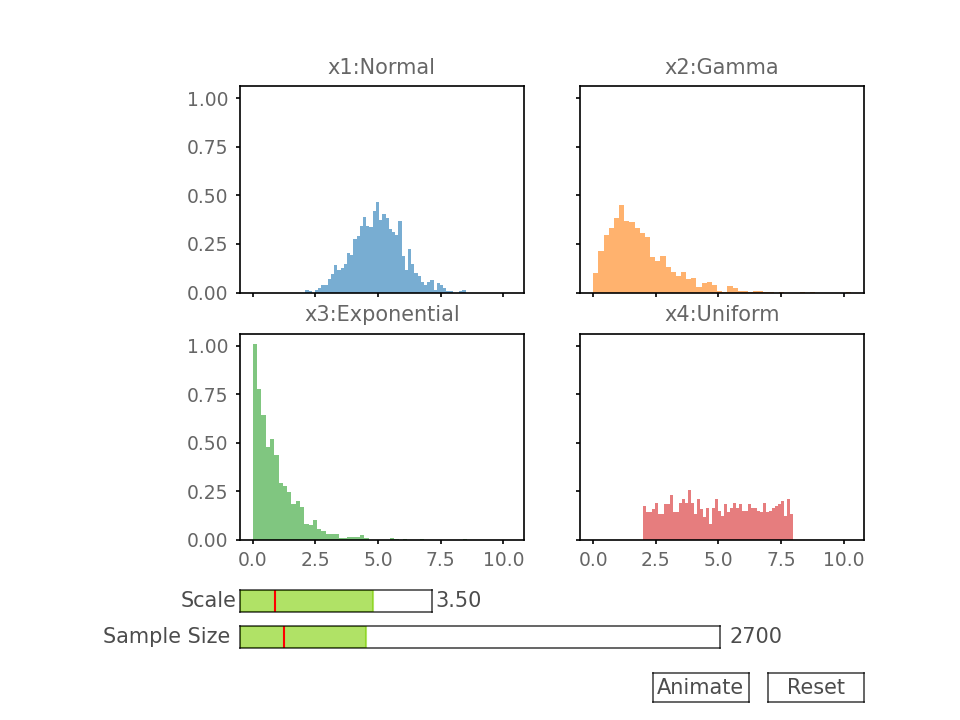

0

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider, Button, CheckButtons

scale_def= 1
sample_def = 1000

def get_distributions(scale, sample):
    x1 = np.random.normal(5, scale_def, sample_def)
    x2 = np.random.gamma(2, scale_def, sample_def)
    x3 = np.random.exponential(scale_def, sample_def)
    x4 = np.random.uniform(2,8, sample_def)
    return x1, x2, x3, x4

x = get_distributions(scale_def, sample_def)

fig, ((ax_normal, ax_gamma), (ax_exp, ax_uniform)) = plt.subplots(2, 2, sharex=True, sharey=True)
plt.subplots_adjust(left=0.25, bottom=0.25)

axs = [ax_normal, ax_gamma, ax_exp, ax_uniform]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
titles = ['x1:Normal', 'x2:Gamma', 'x3:Exponential', 'x4:Uniform']

for i in range(len(axs)):
    axs[i].hist(x[i], bins=50, density=True, alpha=0.6, color=colors[i])
    axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
    axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)

axsample = plt.axes([0.25, 0.1, 0.5, 0.03], facecolor='#ffffff', alpha=0.6)
axscale = plt.axes([0.25, 0.15, 0.2, 0.03], facecolor='#ffffff', alpha=0.6)
sample_slider = Slider(axsample, 'Sample Size', 100, 10000, valinit=sample_def, valstep=100, valfmt='%d', color = "#7ccf00", alpha=0.6) #orientation="vertical"
scale_slider = Slider(axscale, 'Scale', 0.1, 5, valinit=scale_def, valstep=0.1, color = "#7ccf00", alpha=0.6)

def update(val):
    sample = int(sample_slider.val)
    scale = scale_slider.val
    global x
    x = get_distributions(scale, sample) 


step_size = 20
# create the function that will do the plotting, where curr is the current frame
def animate(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == step_size: 
        a.event_source.stop()
    interval = int((10000//step_size)*curr)
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:interval], bins=50, density=True, alpha=0.6, color=colors[i])
        axs[i].set_title(titles[i], {'fontsize':'medium', 'color': [0,0,0,0.6]})
        axs[i].tick_params(axis='both', which=u'both', length=2, labelcolor=[0,0,0,0.6], labelsize=9)
    fig.suptitle('Step = {}'.format(curr), alpha=0.6)
    fig.canvas.draw_idle()


resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', color=[1,1,1,0.6], hovercolor='r')
def reset(event):
    sample_slider.reset()
    scale_slider.reset()


animateax = plt.axes([0.68, 0.025, 0.1, 0.04])
animate_button = Button(animateax, 'Animate', color=[1,1,1,0.6], hovercolor='lightblue')
def start_animation(event):
    global a
    a = animation.FuncAnimation(fig, animate, frames=21, interval=300)
    a.event_source.start()
    HTML(a.to_jshtml())


## Change color for widget texts and spines
slider_color = [0,0,0,0.7]
[ plt.gcf().get_children()[i].get_children()[j].set_color(slider_color) for i in range(5,7) for j in range(2,8)]   
[ plt.gcf().get_children()[i].get_children()[j].set_color(slider_color) for i in range(7,9) for j in range(5)]


sample_slider.on_changed(update)
scale_slider.on_changed(update)
reset_button.on_clicked(reset)
animate_button.on_clicked(start_animation)

<IPython.core.display.Javascript object>


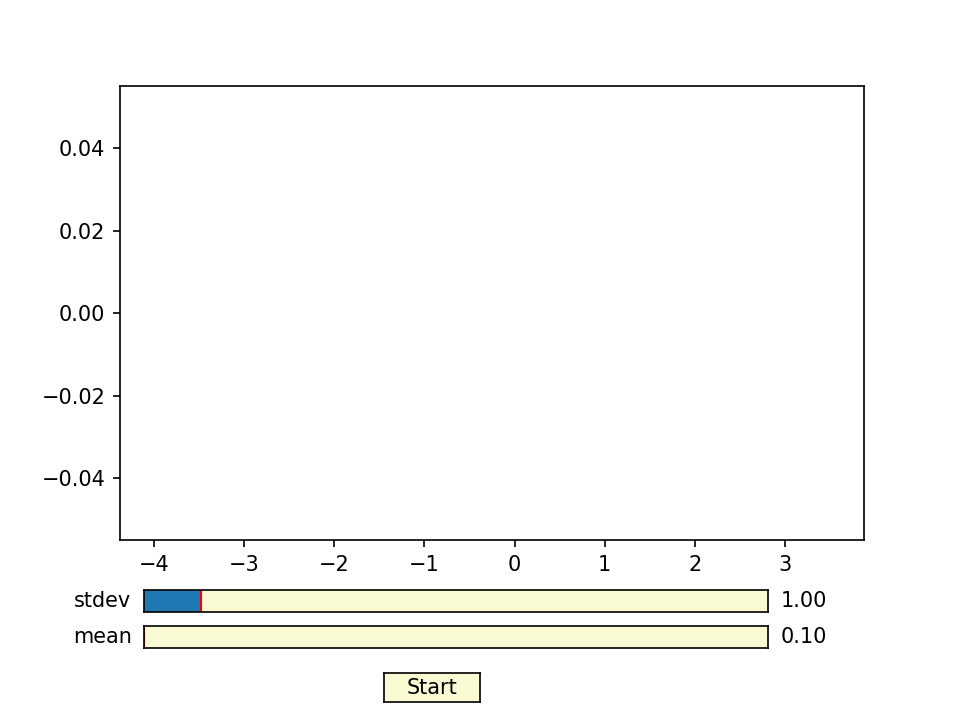

0

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
from pdb import set_trace as bp
import matplotlib.animation as animation
import numpy as np
from matplotlib.widgets import Slider, Button, RadioButtons


fig = plt.figure()

n = 1000

a = None
x = np.array([])
bins = np.arange(-4, 4, 0.5)

plt.hist(x, bins=bins)
plt.subplots_adjust(bottom=0.25)
histaxis = plt.gca()

def update(curr):
    if curr == n: 
        a.event_source.stop()

    histaxis.cla()
    histaxis.hist(x[:curr], bins=100)
    # histaxis.axis([-4,4,0,500])
    histaxis.set_title('Sampling the Normal Distribution')
    histaxis.set_ylabel('Frequency')
    histaxis.set_xlabel('Value')
    histaxis.annotate('n = {}'.format(curr), [3,480])

axcolor = 'lightgoldenrodyellow'
axmu = plt.axes([0.15, 0.1, 0.65, 0.03], facecolor=axcolor)
axstdev = plt.axes([0.15, 0.15, 0.65, 0.03], facecolor=axcolor)

muslider = Slider(axmu, 'mean', 0.1, 30.0, valinit=0)
stdevslider = Slider(axstdev, 'stdev', 0.1, 10.0, valinit=1.0)

startax = plt.axes([0.4, 0.025, 0.1, 0.04])
startbutton = Button(startax, 'Start', color=axcolor, hovercolor='0.975')

newmean = 0
newstdev = 1.0

def getnewparams(val):
    global newmean
    global newstdev
    newmean = muslider.val
    newstdev = stdevslider.val
    
def startanimation(event):
    print(f"params now is {newmean} {newstdev}")
    global x
    x = np.random.normal(loc=newmean, scale=newstdev, size=n)

    global a
    a = animation.FuncAnimation(fig, update, interval=100)
    a.event_source.start()
    
muslider.on_changed(getnewparams)
stdevslider.on_changed(getnewparams)
startbutton.on_clicked(startanimation)